# Thyroid Cancer Project

## Load Libaries 

In [85]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/thyroid_cancer_risk_data.csv')

## Look at Data

In [4]:
# Looking at the top of the data
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [5]:
# Seeing the amount of rows and columns
df.shape

(212691, 17)

## Data cleaning

In [6]:
# Checking for Null values
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [7]:
# Checking for data type of columns
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

# Feature Engineering

In [8]:
# Making the columns lowercase
df.columns = df.columns.str.lower()

# Exploratory Data Analysis

In [9]:
df.head()

,patient_id,age,gender,country,ethnicity,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [10]:
# Checking the percent of ages of the data
df['age'].value_counts(normalize = True)

age
72    0.014091
33    0.013851
29    0.013832
59    0.013715
40    0.013701
        ...   
45    0.012873
38    0.012859
66    0.012859
81    0.012845
84    0.012464
Name: proportion, Length: 75, dtype: float64

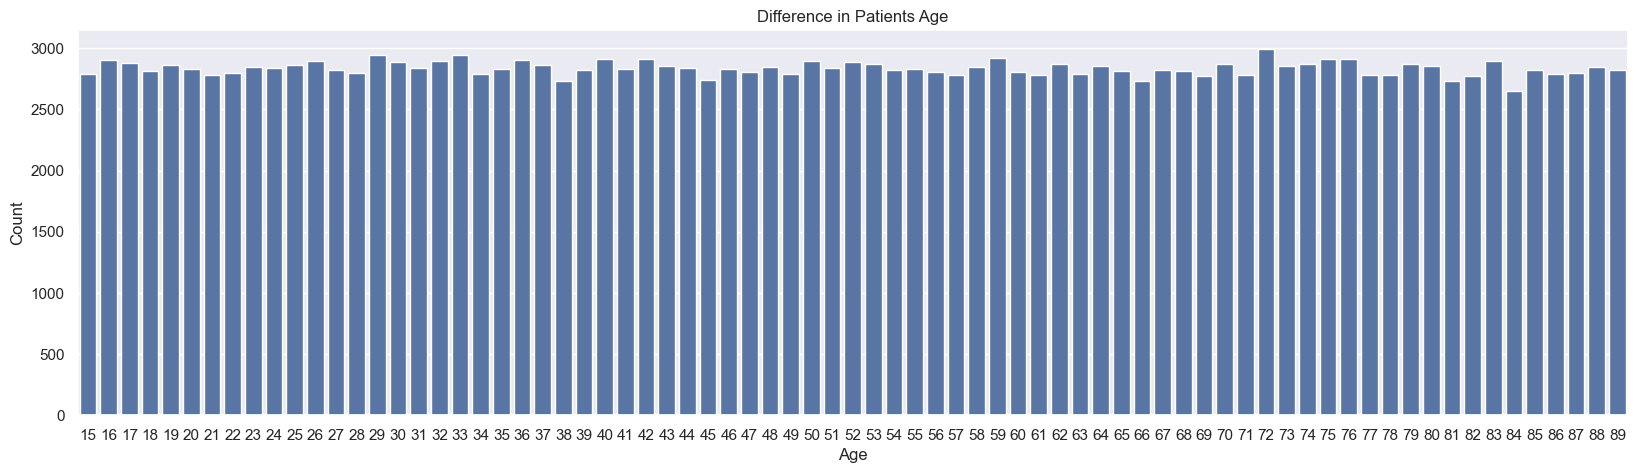

In [11]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20,5))
sns.countplot(df,
             x = 'age')
plt.title('Difference in Patients Age')
plt.xlabel('Age')
plt.ylabel('Count');

> We can see that 72 is the age with the most patients

In [12]:
# Chekcing the differnce of the genders
df['gender'].value_counts(normalize = True)

gender
Female    0.599588
Male      0.400412
Name: proportion, dtype: float64

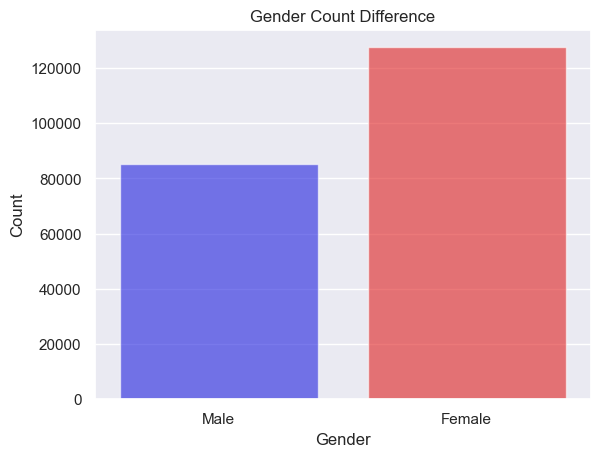

In [13]:
sns.countplot(df,
            x = 'gender',
              hue = 'gender',
             palette=['blue', 'red'],
             alpha = .6)
plt.title('Gender Count Difference')
plt.xlabel('Gender')
plt.ylabel('Count');

> There are 60% of Female platiens in this dataset compared to 40% of Male.

In [14]:
# Which country has the highest patients
df['country'].value_counts(normalize = True)

country
India          0.199802
China          0.150350
Nigeria        0.150067
Brazil         0.100677
Russia         0.100131
Japan          0.079303
South Korea    0.070360
UK             0.050035
USA            0.049640
Germany        0.049635
Name: proportion, dtype: float64

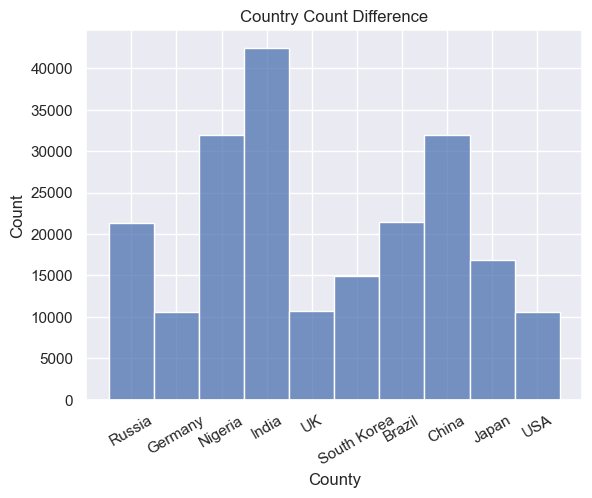

In [15]:
plt.xticks(rotation=30)
sns.histplot(df, 
             x = 'country')
plt.title('Country Count Difference')
plt.xlabel('County')
plt.ylabel('Count');

> India has the Highest patient count in this dataset with 20%. 

In [16]:
# What is the highest ethicicity percent in the data
df['ethnicity'].value_counts(normalize = True)

ethnicity
Caucasian         0.299350
Asian             0.250415
African           0.199416
Hispanic          0.150509
Middle Eastern    0.100310
Name: proportion, dtype: float64

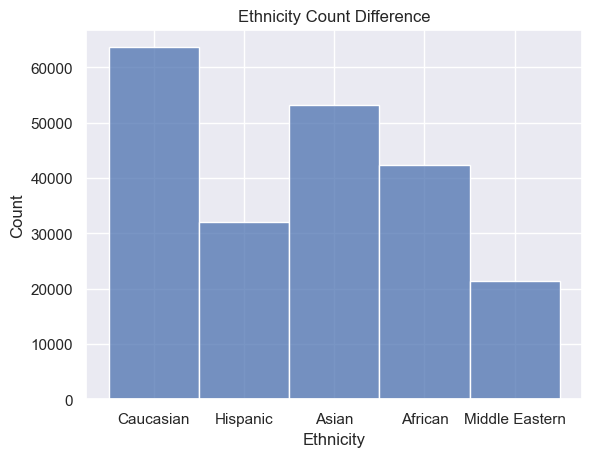

In [17]:
sns.histplot(df, 
             x = 'ethnicity')
plt.title('Ethnicity Count Difference')
plt.xlabel('Ethnicity')
plt.ylabel('Count');

> Here shows Caucasion is the highest count of Ethnicity in the dataset of 30% of patients

In [18]:
# See the difference of patients who have history of thyroid cancer. 
df['family_history'].value_counts(normalize = True)

family_history
No     0.699917
Yes    0.300083
Name: proportion, dtype: float64

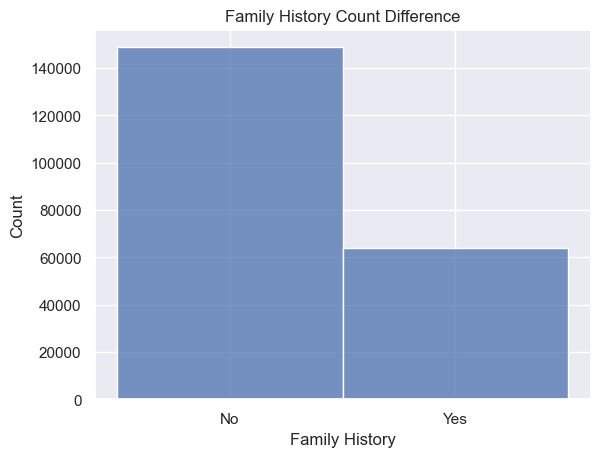

In [19]:
sns.histplot(df,
             x = 'family_history')
plt.title('Family History Count Difference')
plt.xlabel('Family History')
plt.ylabel('Count');

> 70% of patients do not have history of thyroid cancer in thier family. 

In [20]:
# The difference of patients with rediation exlposure
df['radiation_exposure'].value_counts(normalize = True)

radiation_exposure
No     0.850205
Yes    0.149795
Name: proportion, dtype: float64

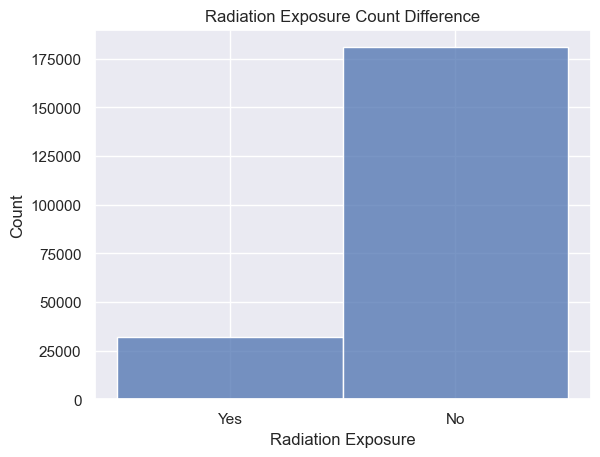

In [21]:
sns.histplot(df,
             x = 'radiation_exposure')
plt.title('Radiation Exposure Count Difference')
plt.xlabel('Radiation Exposure')
plt.ylabel('Count');

> 85% of patients have not been exposed to radiation.

In [22]:
# The difference of the iodine deficiency
df['iodine_deficiency'].value_counts(normalize = True)

iodine_deficiency
No     0.750728
Yes    0.249272
Name: proportion, dtype: float64

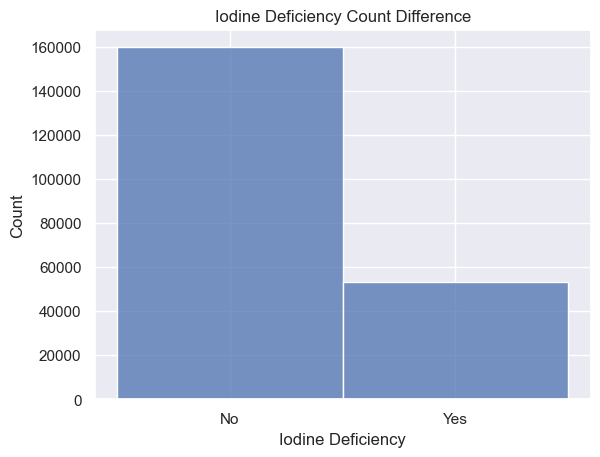

In [23]:
sns.histplot(df, 
             x = 'iodine_deficiency')
plt.title('Iodine Deficiency Count Difference')
plt.xlabel('Iodine Deficiency')
plt.ylabel('Count');

> 75% of patients on not deficient in Iodine, while 25% of patients are. 

In [24]:
df['thyroid_cancer_risk'].value_counts(normalize = True)

thyroid_cancer_risk
Low       0.509603
Medium    0.340400
High      0.149997
Name: proportion, dtype: float64

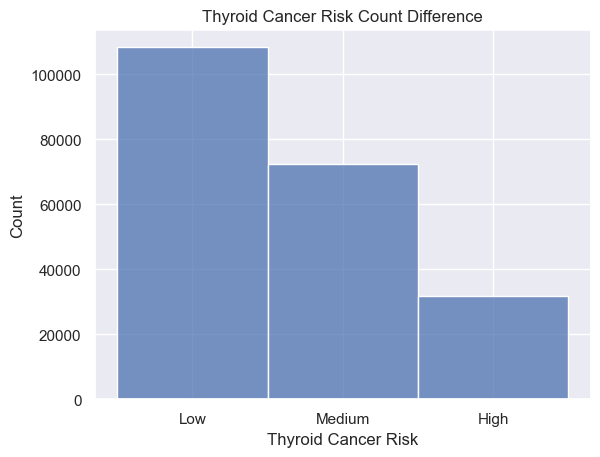

In [25]:
sns.histplot(df, 
             x = 'thyroid_cancer_risk')
plt.title('Thyroid Cancer Risk Count Difference')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count');

> 50% of patients are at low risk of Thyroid cancer, while 15% are at High risk.

In [26]:
df['diagnosis'].value_counts(normalize = True)

diagnosis
Benign       0.767292
Malignant    0.232708
Name: proportion, dtype: float64

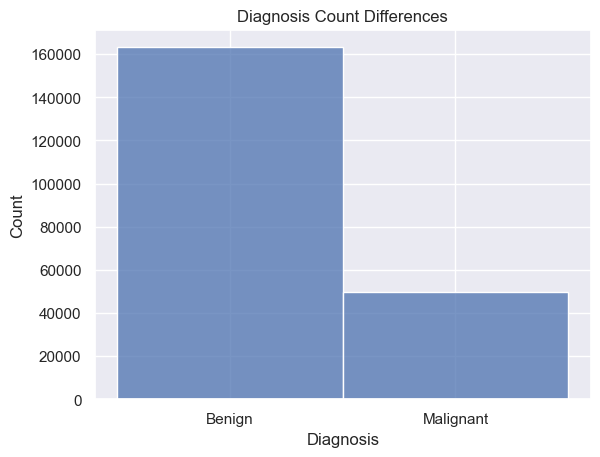

In [27]:
sns.histplot(df,
            x = 'diagnosis')
plt.title('Diagnosis Count Differences')
plt.xlabel('Diagnosis')
plt.ylabel('Count');

> 77% of patient are negitive with cancer, while 23% are positive. 

In [28]:
df.describe()

,patient_id,age,tsh_level,t3_level,t4_level,nodule_size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [29]:
df.head()

,patient_id,age,gender,country,ethnicity,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


- Who are the people with Malignant?
- Which people are at high risk of thyroid cancer?
- Are Male or Female at higher risk?
- Are older patients at a higher risk?

In [30]:
# How many have thyroid cancer?
df.loc[df['diagnosis'] == 'Malignant'].shape

(49495, 17)

In [31]:
df.groupby('gender')['diagnosis'].value_counts(normalize = True)

gender  diagnosis
Female  Benign       0.766794
        Malignant    0.233206
Male    Benign       0.768036
        Malignant    0.231964
Name: proportion, dtype: float64

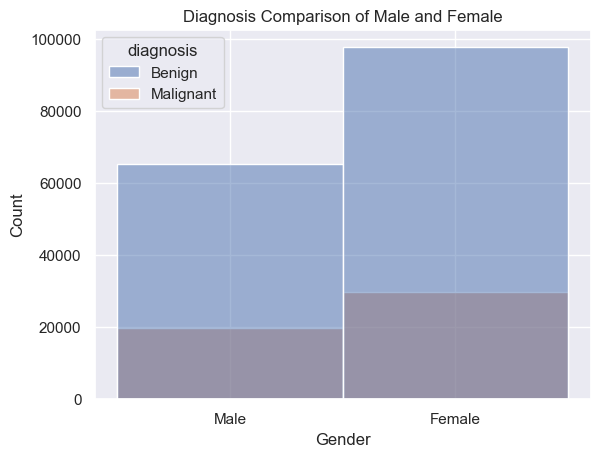

In [95]:
sns.histplot(df,
             x = 'gender',
             hue = 'diagnosis')
plt.title('Diagnosis Comparison of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count');

> This is showing that Female have a higher percent of thyroid cancer at 23.3%, this is a .2% higher then Male.

In [33]:
df.groupby('country')['diagnosis'].value_counts(normalize = True)

country      diagnosis
Brazil       Benign       0.790828
             Malignant    0.209172
China        Benign       0.790543
             Malignant    0.209457
Germany      Benign       0.789997
             Malignant    0.210003
India        Benign       0.671122
             Malignant    0.328878
Japan        Benign       0.793739
             Malignant    0.206261
Nigeria      Benign       0.789711
             Malignant    0.210289
Russia       Benign       0.788374
             Malignant    0.211626
South Korea  Benign       0.793986
             Malignant    0.206014
UK           Benign       0.790923
             Malignant    0.209077
USA          Benign       0.799299
             Malignant    0.200701
Name: proportion, dtype: float64

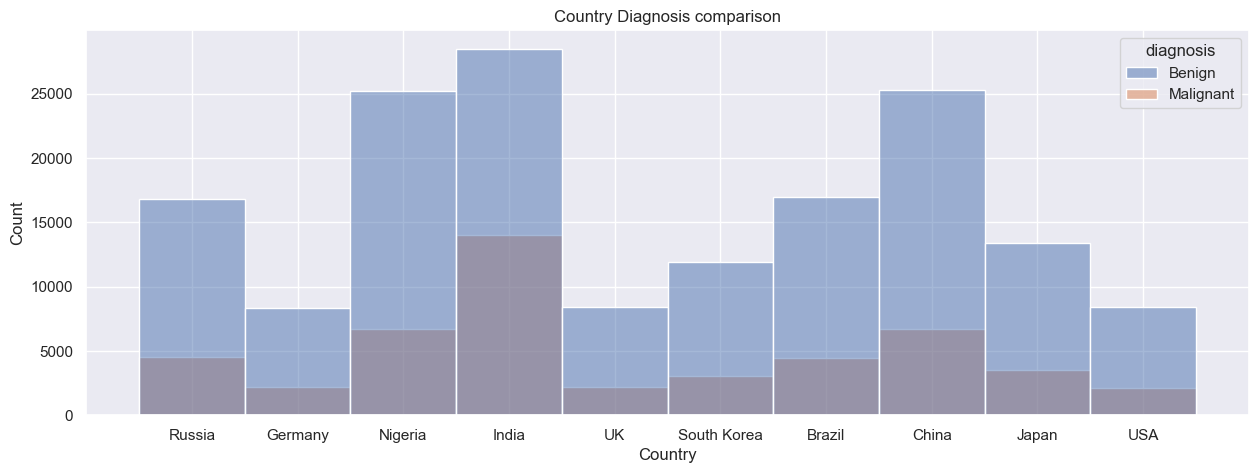

In [96]:
plt.figure(figsize = (15,5))
sns.histplot(df,
              x = 'country',
              hue = 'diagnosis')
plt.title('Country Diagnosis comparison')
plt.xlabel('Country')
plt.ylabel('Count');

> This is showing that India has a higher percent of thyroid cancer about 12% increase than the other countries. 

In [35]:
df.groupby('ethnicity')['diagnosis'].value_counts(normalize = True)

ethnicity       diagnosis
African         Benign       0.745273
                Malignant    0.254727
Asian           Benign       0.665421
                Malignant    0.334579
Caucasian       Benign       0.821483
                Malignant    0.178517
Hispanic        Benign       0.822598
                Malignant    0.177402
Middle Eastern  Benign       0.820670
                Malignant    0.179330
Name: proportion, dtype: float64

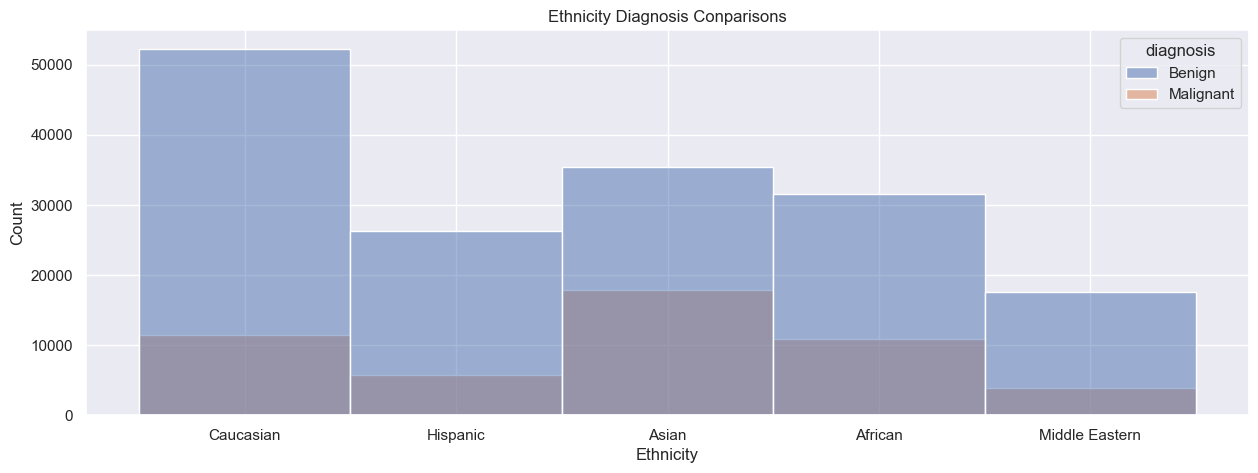

In [97]:
plt.figure(figsize = (15,5))
sns.histplot(df,
              x = 'ethnicity',
              hue = 'diagnosis')
plt.title('Ethnicity Diagnosis Conparisons')
plt.xlabel('Ethnicity')
plt.ylabel('Count');

> This shows that Asian's has more percent of thyroid cancer then the other ethnicities by about 8% more then the following Ethnicity African at 25%

In [37]:
df.groupby('age')['diagnosis'].value_counts(normalize = True)

age  diagnosis
15   Benign       0.776741
     Malignant    0.223259
16   Benign       0.767722
     Malignant    0.232278
17   Benign       0.762418
                    ...   
87   Malignant    0.228346
88   Benign       0.779143
     Malignant    0.220857
89   Benign       0.763288
     Malignant    0.236712
Name: proportion, Length: 150, dtype: float64

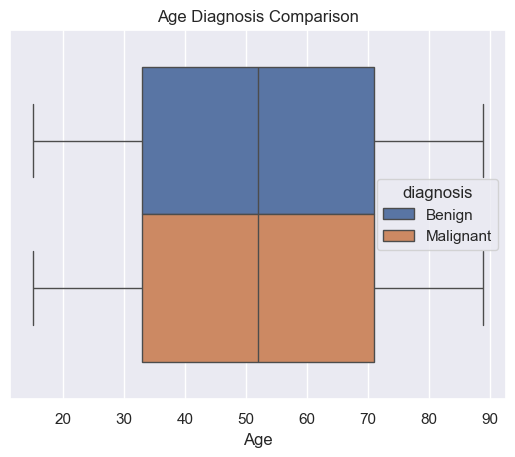

In [98]:
sns.boxplot(df,
              x = 'age',
              hue = 'diagnosis')
plt.title('Age Diagnosis Comparison')
plt.xlabel('Age');

> This is showing that age doesnt play a major role in thyroid cnacer, both are equal. 

In [39]:
df.groupby('family_history')['diagnosis'].value_counts(normalize = True)

family_history  diagnosis
No              Benign       0.806282
                Malignant    0.193718
Yes             Benign       0.676349
                Malignant    0.323651
Name: proportion, dtype: float64

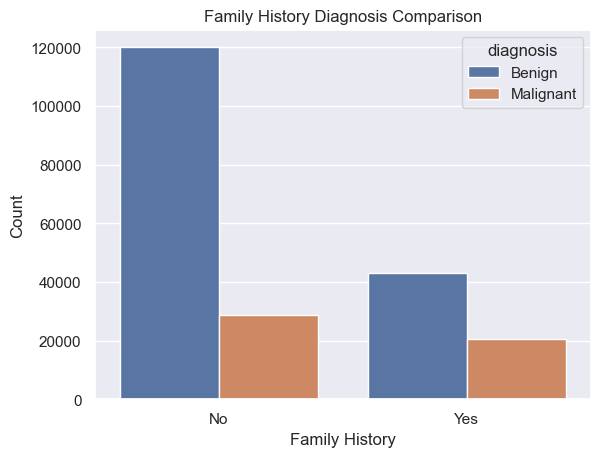

In [99]:
sns.countplot(df,
            x = 'family_history',
            hue = 'diagnosis')
plt.title('Family History Diagnosis Comparison')
plt.xlabel('Family History')
plt.ylabel('Count');

> This shows that having history does make you have a higher chance of thyroid cancer by 13% more than with no history with 19%.

In [41]:
df.groupby('radiation_exposure')['diagnosis'].value_counts(normalize = True)

radiation_exposure  diagnosis
No                  Benign       0.783085
                    Malignant    0.216915
Yes                 Benign       0.677652
                    Malignant    0.322348
Name: proportion, dtype: float64

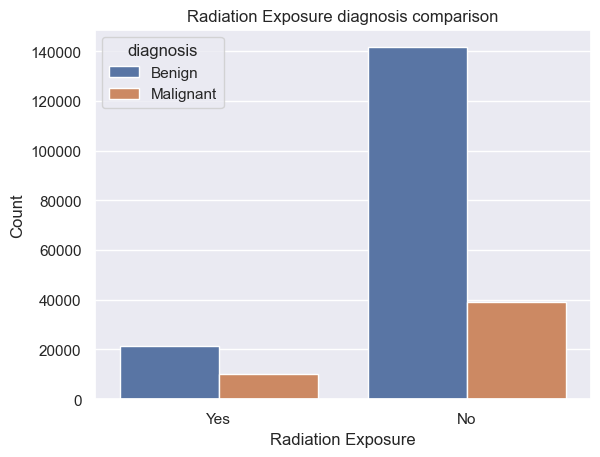

In [101]:
sns.countplot(df,
            x = 'radiation_exposure',
            hue = 'diagnosis')
plt.title('Radiation Exposure diagnosis comparison')
plt.xlabel('Radiation Exposure')
plt.ylabel('Count');

> This is showing with exposure there is a higher chance of thyroid cancer with 11% more with no exposure. 

In [43]:
df.groupby('iodine_deficiency')['diagnosis'].value_counts(normalize = True)

iodine_deficiency  diagnosis
No                 Benign       0.791405
                   Malignant    0.208595
Yes                Benign       0.694670
                   Malignant    0.305330
Name: proportion, dtype: float64

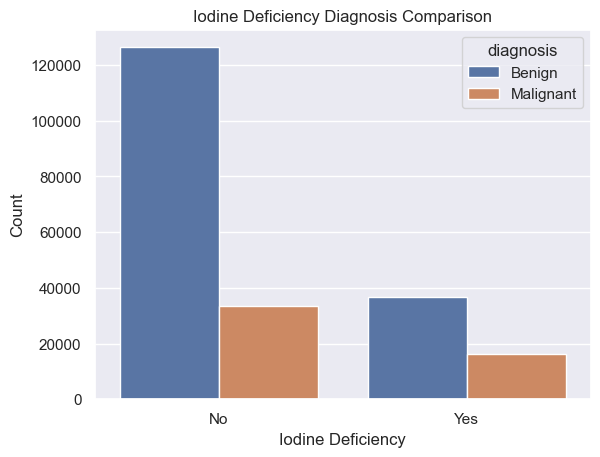

In [102]:
sns.countplot(df,
            x = 'iodine_deficiency',
            hue = 'diagnosis')
plt.title('Iodine Deficiency Diagnosis Comparison')
plt.xlabel('Iodine Deficiency')
plt.ylabel('Count');

> With low Iodine you are at a 10% higher risk of thyroid cancer compare to efficient idion levels at 21%.

In [45]:
df.groupby('smoking')['diagnosis'].value_counts(normalize = True)

smoking  diagnosis
No       Benign       0.767473
         Malignant    0.232527
Yes      Benign       0.766562
         Malignant    0.233438
Name: proportion, dtype: float64

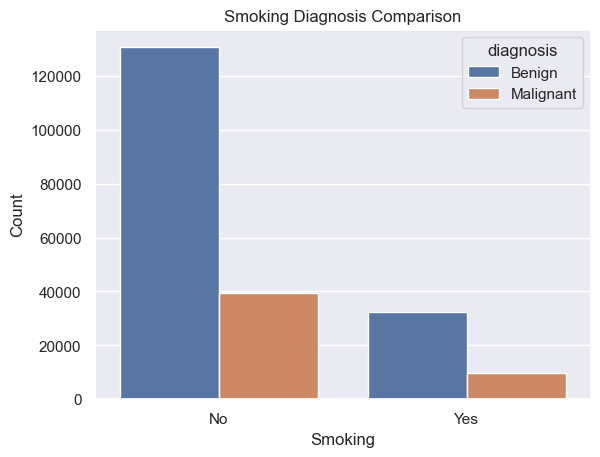

In [103]:
sns.countplot(df,
            x = 'smoking',
            hue = 'diagnosis')
plt.title('Smoking Diagnosis Comparison')
plt.xlabel('Smoking')
plt.ylabel('Count');

> This shows smoking or non-smoking are equally at risk of thyroid cancer

In [47]:
df.groupby('obesity')['diagnosis'].value_counts(normalize = True)

obesity  diagnosis
No       Benign       0.766950
         Malignant    0.233050
Yes      Benign       0.768087
         Malignant    0.231913
Name: proportion, dtype: float64

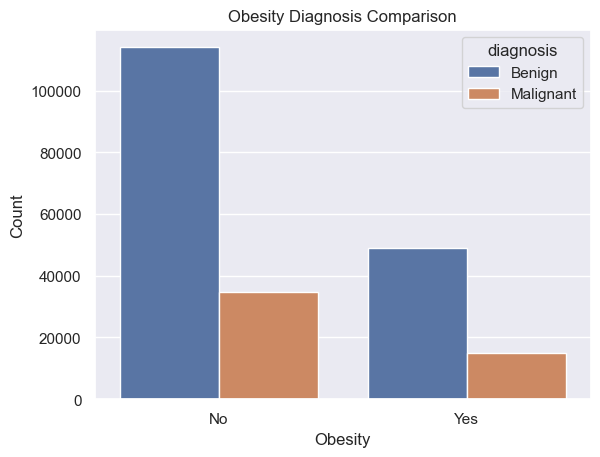

In [104]:
sns.countplot(df,
            x = 'obesity',
            hue = 'diagnosis')
plt.title('Obesity Diagnosis Comparison')
plt.xlabel('Obesity')
plt.ylabel('Count');

> This shows that being obese is not big factor in thyroid cancer.

In [49]:
df.groupby('diabetes')['diagnosis'].value_counts(normalize = True)

diabetes  diagnosis
No        Benign       0.766611
          Malignant    0.233389
Yes       Benign       0.770009
          Malignant    0.229991
Name: proportion, dtype: float64

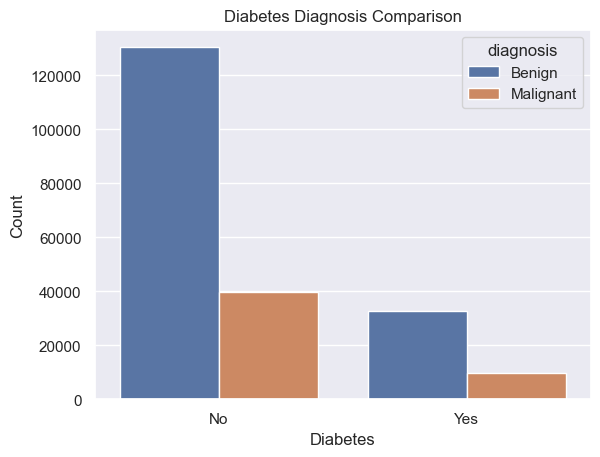

In [105]:
sns.countplot(df,
            x = 'diabetes',
            hue = 'diagnosis')
plt.title('Diabetes Diagnosis Comparison')
plt.xlabel('Diabetes')
plt.ylabel('Count');

> This shows having disbetes does not show a factor in thyroid cancer.

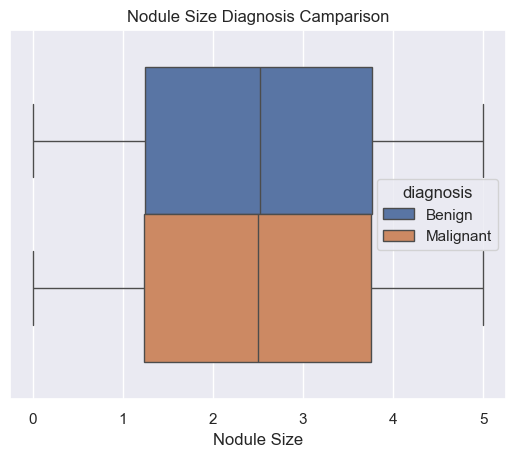

In [106]:
sns.boxplot(df,
            x = 'nodule_size',
            hue = 'diagnosis')
plt.title('Nodule Size Diagnosis Camparison')
plt.xlabel('Nodule Size');

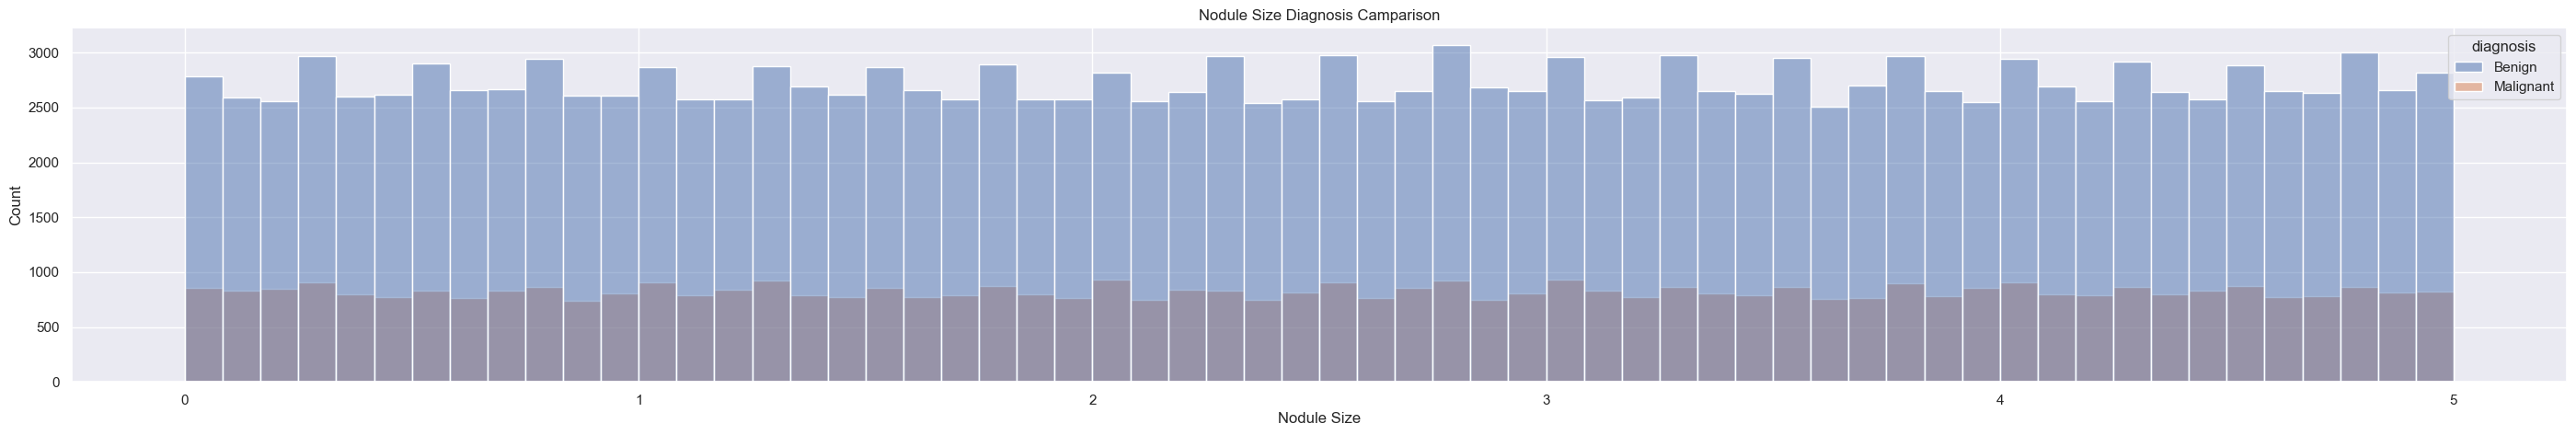

In [107]:
plt.figure(figsize = (35,5))
sns.histplot(df,
            x = 'nodule_size',
            hue = 'diagnosis')
plt.title('Nodule Size Diagnosis Camparison')
plt.xlabel('Nodule Size')
plt.ylabel('Count');

> This shows that is does not matter the size of the nodule, thyroid cancer is not effected by nodule size.

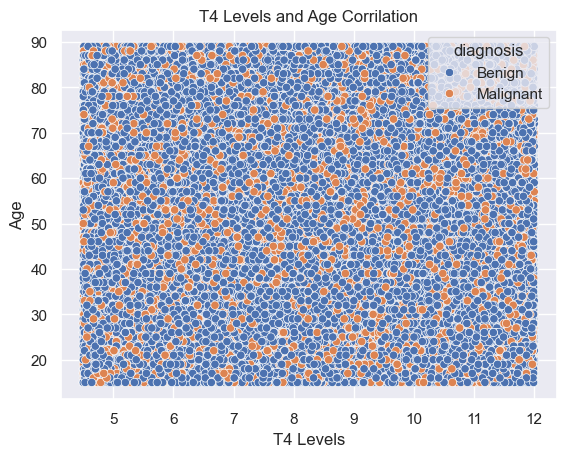

In [108]:
sns.scatterplot(df,
            x = 't4_level',
            y = 'age',
               hue = 'diagnosis')
plt.title('T4 Levels and Age Corrilation')
plt.xlabel('T4 Levels')
plt.ylabel('Age');

> __There is no corrilation with Age and t4 level.__

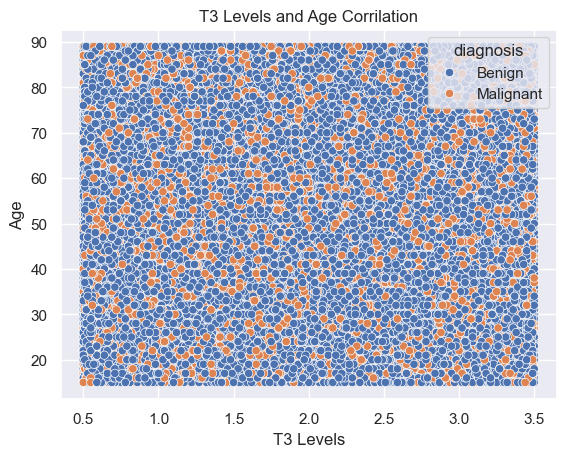

In [109]:
sns.scatterplot(df,
            x = 't3_level',
            y = 'age',
               hue = 'diagnosis')
plt.title('T3 Levels and Age Corrilation')
plt.xlabel('T3 Levels')
plt.ylabel('Age');

> __There is no corrilation with Age and t3 level.__

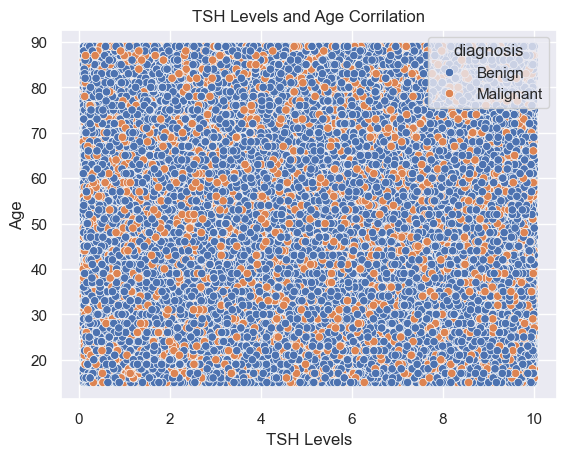

In [110]:
sns.scatterplot(df,
            x = 'tsh_level',
            y = 'age',
               hue = 'diagnosis')
plt.title('TSH Levels and Age Corrilation')
plt.xlabel('TSH Levels')
plt.ylabel('Age');

> __There is no corrilation with Age and tsh level.__

In [56]:
df.head()

,patient_id,age,gender,country,ethnicity,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


# Lets Dummify columns 

In [57]:
# Let's dummify Country column so we can use it!
df_country_dummy = pd.get_dummies(df, columns = ['country'], dtype = int, drop_first = True)

In [58]:
df_country_dummy.head()

,patient_id,age,gender,ethnicity,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,...,diagnosis,country_China,country_Germany,country_India,country_Japan,country_Nigeria,country_Russia,country_South Korea,country_UK,country_USA
0,1,66,Male,Caucasian,No,Yes,No,No,No,No,...,Benign,0,0,0,0,0,1,0,0,0
1,2,29,Male,Hispanic,No,Yes,No,No,No,No,...,Benign,0,1,0,0,0,0,0,0,0
2,3,86,Male,Caucasian,No,No,No,No,No,No,...,Benign,0,0,0,0,1,0,0,0,0
3,4,75,Female,Asian,No,No,No,No,No,No,...,Benign,0,0,1,0,0,0,0,0,0
4,5,35,Female,African,Yes,Yes,No,No,No,No,...,Benign,0,1,0,0,0,0,0,0,0


In [59]:
# Let's dummify Ethnicity column so we can use it!
df_ethnicity_dummy = pd.get_dummies(df, columns = ['ethnicity'], dtype = int, drop_first = True)

In [60]:
df_ethnicity_dummy.head()

,patient_id,age,gender,country,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Middle Eastern
0,1,66,Male,Russia,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,0,1,0,0
1,2,29,Male,Germany,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,0,0,1,0
2,3,86,Male,Nigeria,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,0,1,0,0
3,4,75,Female,India,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,1,0,0,0
4,5,35,Female,Germany,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,0,0,0,0


In [61]:
# Lets combine dummies 
combine_df = pd.get_dummies(df_country_dummy, columns = ['ethnicity'], dtype = int, drop_first = True)

In [62]:
combine_df.head()

,patient_id,age,gender,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,...,country_Japan,country_Nigeria,country_Russia,country_South Korea,country_UK,country_USA,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Middle Eastern
0,1,66,Male,No,Yes,No,No,No,No,9.37,...,0,0,1,0,0,0,0,1,0,0
1,2,29,Male,No,Yes,No,No,No,No,1.83,...,0,0,0,0,0,0,0,0,1,0
2,3,86,Male,No,No,No,No,No,No,6.26,...,0,1,0,0,0,0,0,1,0,0
3,4,75,Female,No,No,No,No,No,No,4.10,...,0,0,0,0,0,0,1,0,0,0
4,5,35,Female,Yes,Yes,No,No,No,No,9.10,...,0,0,0,0,0,0,0,0,0,0


# Categorical Variables into Numerical 

In [63]:
df.head()

,patient_id,age,gender,country,ethnicity,family_history,radiation_exposure,iodine_deficiency,smoking,obesity,diabetes,tsh_level,t3_level,t4_level,nodule_size,thyroid_cancer_risk,diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [64]:
# Map thyroid cancer risk to numbers and type to int
cancer_risk_map = { 'Low': 0, 'Medium': 1, 'High': 2}
combine_df['thyroid_cancer_risk'] = (
    combine_df['thyroid_cancer_risk']
    .replace(cancer_risk_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\1428454035.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(cancer_risk_map)


In [65]:
combine_df['thyroid_cancer_risk'].value_counts()

thyroid_cancer_risk
0    108388
1     72400
2     31903
Name: count, dtype: int64

In [66]:
# Map gender to numbers and type to int
gender_map = {'Female': 0, 'Male': 1}
combine_df['gender'] = (
    combine_df['gender']
    .replace(gender_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\3020645998.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(gender_map)


In [67]:
combine_df['gender'].value_counts()

gender
0    127527
1     85164
Name: count, dtype: int64

In [68]:
# Map family history to numbers and type to int
history_map = {'No': 0, 'Yes': 1}
combine_df['family_history'] = (
    combine_df['family_history']
    .replace(history_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\2535428149.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(history_map)


In [69]:
combine_df['family_history'].value_counts()

family_history
0    148866
1     63825
Name: count, dtype: int64

In [70]:
# Map radiation exposure to numbers and type to int
exposure_map = {'No': 0, 'Yes': 1}
combine_df['radiation_exposure'] = (
    combine_df['radiation_exposure']
    .replace(exposure_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\3727192237.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(exposure_map)


In [71]:
combine_df['radiation_exposure'].value_counts()

radiation_exposure
0    180831
1     31860
Name: count, dtype: int64

In [72]:
# Map iodine deficiency to numbers and type to int
iodine_map = {'No': 0, 'Yes': 1}
combine_df['iodine_deficiency'] = (
    combine_df['iodine_deficiency']
    .replace(iodine_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\410448659.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(iodine_map)


In [73]:
combine_df['iodine_deficiency'].value_counts()

iodine_deficiency
0    159673
1     53018
Name: count, dtype: int64

In [74]:
# Map smoking to numbers and type to int
smoking_map = {'No': 0, 'Yes': 1}
combine_df['smoking'] = (
    combine_df['smoking']
    .replace(smoking_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\1220469278.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(smoking_map)


In [75]:
combine_df['smoking'].value_counts()

smoking
0    170260
1     42431
Name: count, dtype: int64

In [76]:
# Map obesity to numbers and type to int
obesity_map = {'No': 0, 'Yes': 1}
combine_df['obesity'] = (
    combine_df['obesity']
    .replace(obesity_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\2084721440.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(obesity_map)


In [77]:
combine_df['obesity'].value_counts()

obesity
0    148805
1     63886
Name: count, dtype: int64

In [78]:
# Map diabetes to numbers and type to int
diabetes_map = {'No': 0, 'Yes': 1}
combine_df['diabetes'] = (
    combine_df['diabetes']
    .replace(diabetes_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\1076769827.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(diabetes_map)


In [79]:
combine_df['diabetes'].value_counts()

diabetes
0    170098
1     42593
Name: count, dtype: int64

In [80]:
# Map diagnosis to numbers and type to int
diagnosis_map = {'Benign': 0, 'Malignant': 1}
combine_df['diagnosis'] = (
    combine_df['diagnosis']
    .replace(diagnosis_map)
    .infer_objects(copy=False)
    .astype(int)
)

C:\Users\mtorr\AppData\Local\Temp\ipykernel_1712\942494954.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(diagnosis_map)


In [81]:
combine_df['diagnosis'].value_counts()

diagnosis
0    163196
1     49495
Name: count, dtype: int64

# More EDA With New Conversion

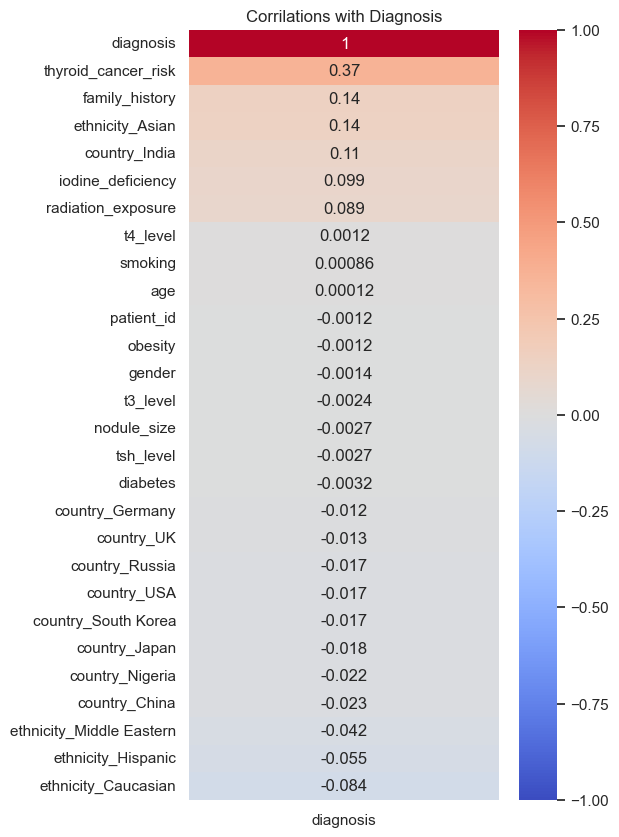

In [112]:
# Heatmap corrilation

plt.figure(figsize = (5, 10))
sns.heatmap(combine_df.corr(numeric_only = True)[['diagnosis']].sort_values(by = 'diagnosis', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)
plt.title('Corrilations with Diagnosis');

> Now we can see positive corrilations and negatives, with thyroid cancer risk being the highest positive corrilation at 0.37. Following family history at 0.14, ethnicity being asian at 0.14, then country origin being india at 0.11.

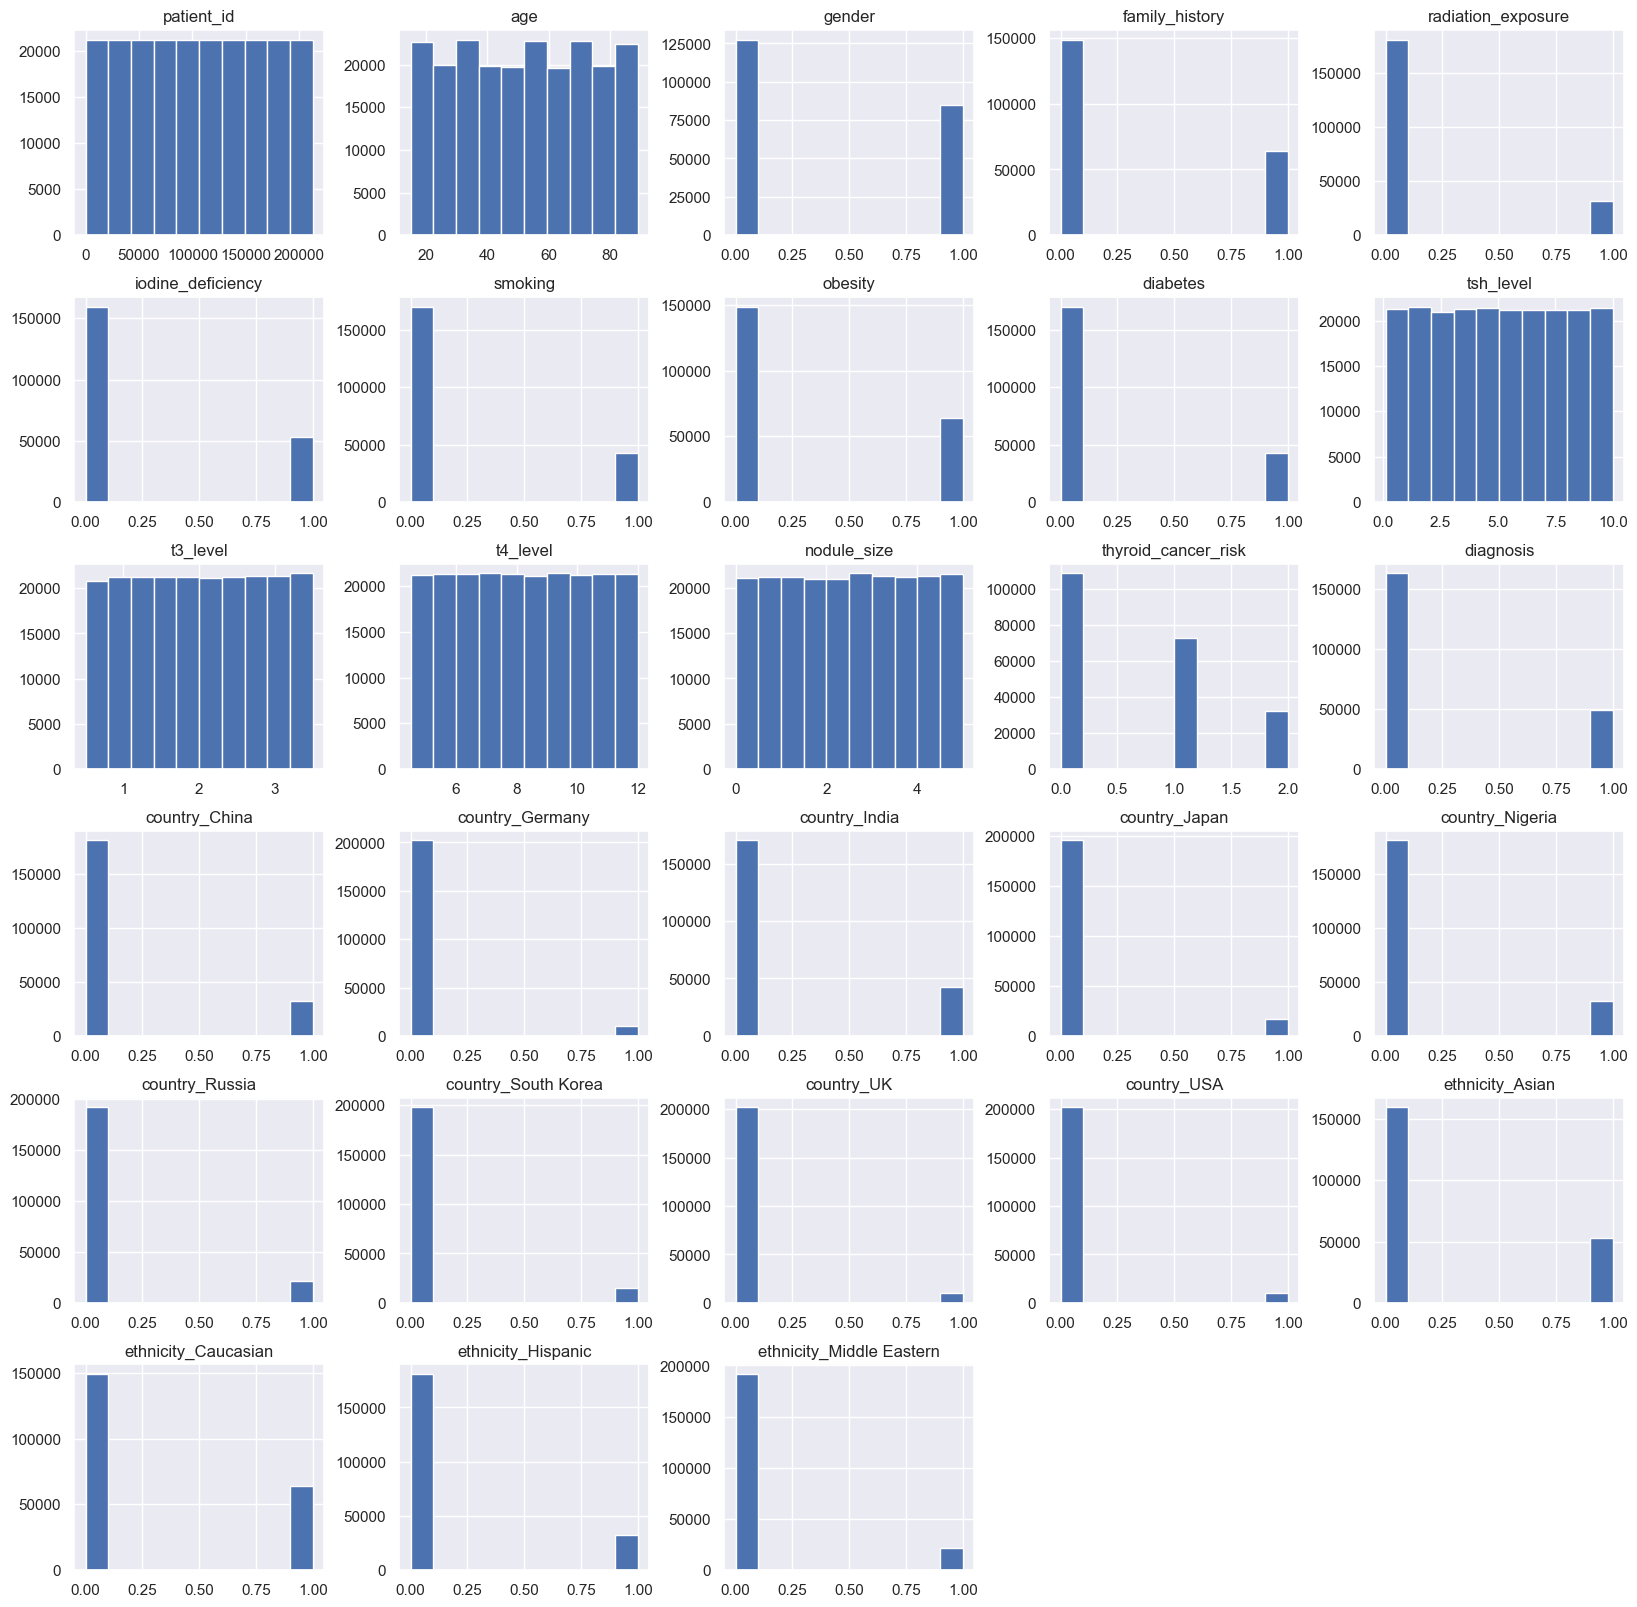

In [92]:
combine_df.hist(figsize = (20, 20));
            

# Save to csv!

In [94]:
combine_df.to_csv('data/cleaned_thyroid_data.csv')